# Tutorial 1: The Basics

A simple tutorial to plot phylogenies easily
You need to:

1. Load a standard Newick tree.
2. Customize the visual style.

**Data:** A simple Newick tree located in `../examples/data/basic/tree.nwk`.

In [63]:
import phylustrator as ph
import ete3

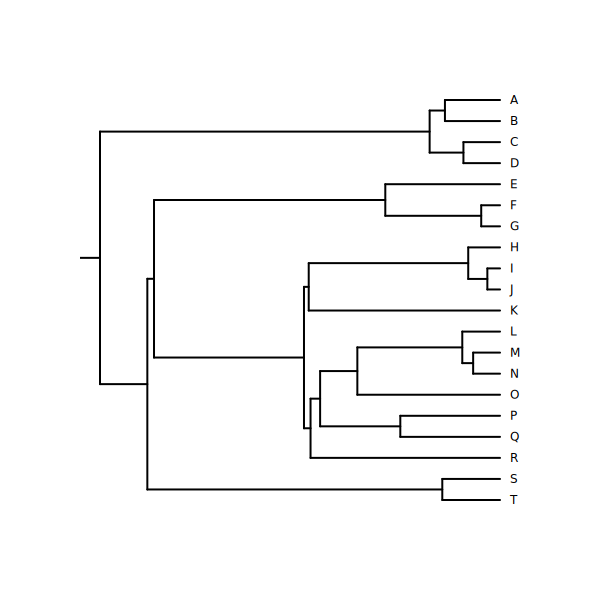

In [68]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()
v.d

# Decorating a tree

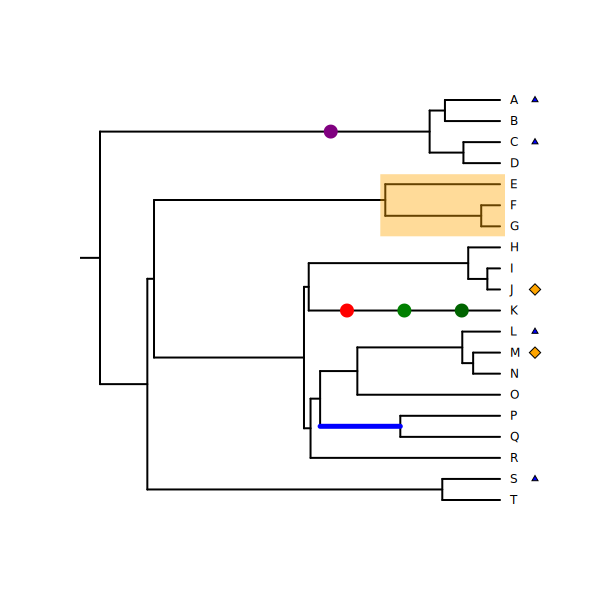

In [77]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()

# Adding shapes

v.add_leaf_shapes(leaves=["A", "C", "L", "S"],
    shape="triangle",
    fill="blue",
    size=6,
    stroke="black",
    stroke_width=1,
    offset=35,     # distance from the leaf tip
)

v.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    size=8,
    stroke="black",
    stroke_width=1,
    offset=35,
    rotation=45,
)

events = [
    {"branch": "K", "where": 0.2, "shape": "circle",  "fill": "red",  "size": 14},
    {"branch": "K", "where": 0.5, "shape": "circle",  "fill": "green","size": 14},
    {"branch": "K", "where": 0.8, "shape": "circle",  "fill": "darkgreen", "size": 14},
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("A", "D") # To select inner nodes

events = [
    {"branch": target, "where": 0.7, "shape": "circle",  "fill": "purple",  "size": 14},
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("E", "G") # To select inner nodes
v.highlight_clade(target, color="orange", opacity=0.4)

target = t.get_common_ancestor("P", "Q") 
v.highlight_branch(target, color="blue", size=5)


#target = t.get_common_ancestor("H", "J") 
#v.gradient_branch(target, colors=("blue", "red"), size=6)

v.d

In [31]:
# SVG always works
v.save_svg("out/vertical_tree.svg")

# PNG requires cairosvg (install: pip install "phylustrator[export]")
v.save_png("out/vertical_tree.png", scale=3.0)


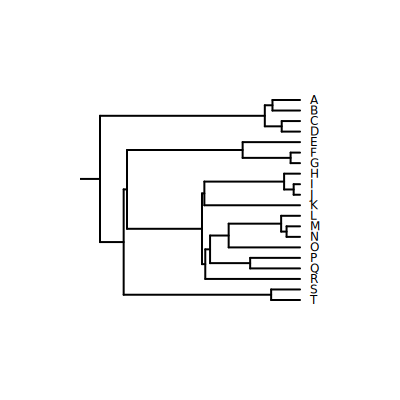

In [41]:
v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()
v.d

In [39]:
# Color the whole tree blue, but the 'orange' clade green
branch_colors = {n: "blue" for n in t.traverse()}
for n in clade_2.traverse():
    branch_colors[n] = "green"

v.draw(branch_colors)
v.d

# Plotting a vertical tree

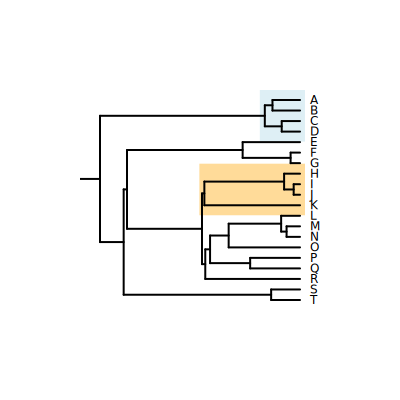

In [42]:
# 1. Highlight a Clade (Shaded Background)

v_drawer = ph.VerticalTreeDrawer(t, style=my_style)
v_drawer.add_leaf_names()

target_node = t.get_common_ancestor("A", "D") 
v_drawer.highlight_clade(target_node, color="lightblue", opacity=0.4)

target_node = t.get_common_ancestor("K", "H") # Adjust "C", "D" to match your tree's leaf names
v_drawer.highlight_clade(target_node, color="orange", opacity=0.4)

v_drawer.draw()
v_drawer.d

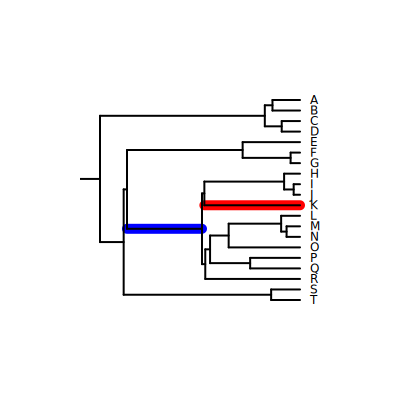

In [43]:
# Initialize Drawer
v_drawer = ph.VerticalTreeDrawer(t, style=my_style)

# Let's highlight the branch leading to leaf "F"
leaf_f = t.search_nodes(name="K")[0]
v_drawer.highlight_branch(leaf_f, color="red", size=10)

target_node = t.get_common_ancestor("H", "R") 
v_drawer.highlight_branch(target_node, color="blue", size=10)

v_drawer.add_leaf_names()
v_drawer.draw()
v_drawer.d

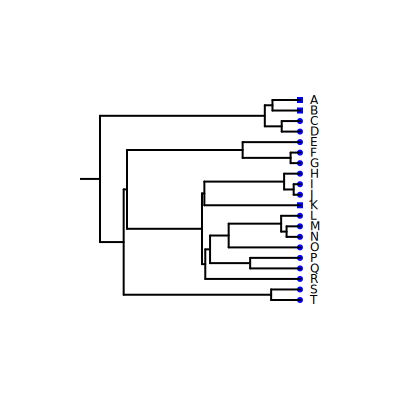

In [45]:
v_drawer = ph.VerticalTreeDrawer(t, style=my_style)

markers = {"A": "blue", "B": "blue", "K": "green"}
v_drawer.add_leaf_shapes(markers, shape="square", size=6, )

markers = {letter:"red" for letter in "CDEFGHIJLMNOPQRST"}
v_drawer.add_leaf_shapes(markers, shape="circle", size=6,)

# Finalize
v_drawer.add_leaf_names()
v_drawer.draw()
v_drawer.d

In [46]:
# Initialize clean drawer
v_drawer = ph.VerticalTreeDrawer(t, style=linear_style)

# 1. Gradient Branch
# Visualizing a transition on the branch leading to Node "C"
# This creates a smooth transition from Blue (Ancestor) to Red (Descendant)
node_c = t.search_nodes(name="E")[0]
v_drawer.gradient_branch(node_c, colors=("blue", "red"), size=6)

node_parent = node_c.up
v_drawer.gradient_branch(node_parent, colors=("cyan", "blue"), size=6)

v_drawer.add_leaf_names()
v_drawer.draw()
v_drawer.d

NameError: name 'linear_style' is not defined

In [47]:
# Initialize clean drawer
v_drawer = ph.VerticalTreeDrawer(t, style=linear_style)

transfers = [
    {'from': 'A', 'to': 'E', 'freq': 1.0},
    {'from': 'K', 'to': 'Q', 'freq': 0.5}
]

# 2. Draw Links
# gradient_colors creates the nice flow direction
v_drawer.add_transfer_links(
    transfers, 
    gradient_colors=("purple", "orange"),
    arrows=False,          # Add the arrowhead
    vary_width=True,      # Scale thickness by 'freq'
    stroke_width=12,       # Base max thickness
    opacity_scale=0.8
)


v_drawer.add_leaf_names()
v_drawer.draw()
v_drawer.d

NameError: name 'linear_style' is not defined

In [48]:
linear_style = ph.TreeStyle(
    width=600, 
    height=600,
    branch_size=6,
    branch_color="black",
    leaf_size=0,
    leaf_color="grey",  
    node_size=0          # Set to 0 to hide internal nodes for a cleaner look
)

v_drawer = ph.VerticalTreeDrawer(t, style=linear_style)
target_node = t.get_common_ancestor("H", "R")

# Start by setting the "Background" color (Rest of the tree)
node_colors = {n: "blue" for n in t.traverse()}
# We make some nodes green
for n in target_node.traverse():
    node_colors[n] = "green"

v_drawer.draw(branch2color=node_colors)
v_drawer.gradient_branch(target_node, colors=("blue", "green"), size=v_drawer.style.branch_size)
v_drawer.add_leaf_names()
v_drawer.d

AttributeError: 'GradientStop' object has no attribute 'add_stop'

# Putting all together

In [ ]:
# 1. Setup the Style (Clean look, hiding default nodes/leaves)
final_style = ph.TreeStyle(
    width=400, 
    height=400,
    branch_size=3,
    leaf_size=0,        # Hide default dots so we can add custom shapes
    node_size=0,
    branch_color="blue" # Default fallback
)

v_drawer = ph.VerticalTreeDrawer(t, style=final_style)

# --- A. PREPARE COLORS (Blue Tree -> Green Subtree) ---
# 1. Default all to blue
node_colors = {n: "blue" for n in t.traverse()}

# 2. Identify the Green Subtree (Ancestor of H and R)
green_ancestor = t.get_common_ancestor("H", "R")
for n in green_ancestor.traverse():
    node_colors[n] = "#E15E4C"


# --- B. BACKGROUND HIGHLIGHTS (Draw these BEFORE the tree lines) ---
# Highlight the clade for A and B with a light background
clade_ab = t.get_common_ancestor("A", "B")
v_drawer.highlight_clade(clade_ab, color="lightgray", opacity=0.7)


# --- C. DRAW THE MAIN TREE ---
# This draws the skeleton using our custom color map
v_drawer.draw(branch2color=node_colors)


# --- D. FOREGROUND DECORATIONS (Draw these AFTER the tree lines) ---

# 1. Gradient Bridge (The transition from Blue to Green)
v_drawer.gradient_branch(green_ancestor, colors=("#0047AB", "#E15E4C"), size=4)

# 2. Highlight a Specific Lineage (Overwrites the base tree color)
# Let's highlight the path to leaf "K" in red
leaf_k = t.search_nodes(name="K")[0]
v_drawer.highlight_branch(leaf_k, color="#E15E4C", size=6)

# 3. Add Transfer Links (with our fixed Arrow logic!)
transfers = [
    {'from': 'A', 'to': 'E', 'freq': 1.0},
    {'from': 'L', 'to': 'Q', 'freq': 0.5}
]
v_drawer.add_transfer_links(
    transfers, 
    gradient_colors=("purple", "orange"), 
    arrows=False, 
    vary_width=True, 
    stroke_width=8,
    opacity_scale=0.8
)

# 4. Add Leaf Shapes
# Squares for the A-B clade
squares = {"A": "purple", "C": "black"}
v_drawer.add_leaf_shapes(squares, shape="square", size=8, padding=35)

# Circles for the Green Clade
# We grab all names in the green subtree
green_leaves = {leaf.name: "#E15E4C" for leaf in green_ancestor.get_leaves()}
v_drawer.add_leaf_shapes(green_leaves, shape="circle", size=6, padding=35)

# 5. Add Text Labels
v_drawer.add_leaf_names()

# --- E. DISPLAY ---
v_drawer.d

In [ ]:
# You can save as SVG, PNG, or PDF simply by changing the extension
v_drawer.save_figure("basic_vertical_tree.png", scale=4) 
#v_drawer.save_figure("basic_vertical_tree.pdf") 
#v_drawer.save_figure("basic_vertical_tree.svg")